In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('complete_df.csv')
df = df[2608:].drop(columns = ['Unnamed: 0', 'league', 'teamname',"ban1", "ban2", "ban3", "ban4", "ban5", 
    "pick1", "pick2", "pick3", "pick4", "pick5"] )

In [4]:

df["pga_diff"] = df.groupby("gameid")["PGA"].transform(lambda x: x - x.iloc[::-1].values)
df = df.dropna()
df

,year,gameid,side,num_counters_picked,num_counters_banned,PGA,higher_PGA,mean_champ_wr,mean_team_wr,result,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,pga_diff
2608,2017,ESPORTSTMNT02/260365,Blue,0,0,0,0,0.513931,0.466667,1,3231.0,4427.0,89.0,3200.0,4566.0,87.0,31.0,-139.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2609,2017,ESPORTSTMNT02/260365,Red,1,0,1,1,0.502757,0.555556,0,3200.0,4566.0,87.0,3231.0,4427.0,89.0,-31.0,139.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2610,2017,ESPORTSTMNT02/260374,Blue,0,1,1,0,0.497727,0.606061,1,3170.0,4640.0,83.0,3048.0,4576.0,77.0,122.0,64.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2611,2017,ESPORTSTMNT02/260374,Red,1,1,2,1,0.508189,0.397618,0,3048.0,4576.0,77.0,3170.0,4640.0,83.0,-122.0,-64.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2612,2017,ESPORTSTMNT02/260379,Blue,1,0,1,0,0.500533,0.444444,0,3074.0,3566.0,59.0,3388.0,4589.0,86.0,-314.0,-1023.0,-27.0,1.0,0.0,1.0,0.0,1.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88345,2025,LOLTMNT06_96854,Red,1,1,2,1,0.497897,0.614958,1,3427.0,5045.0,94.0,3049.0,4089.0,77.0,378.0,956.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,2
88346,2025,LOLTMNT06_96867,Blue,1,2,3,1,0.501714,0.282609,0,3002.0,4471.0,73.0,3440.0,4928.0,94.0,-438.0,-457.0,-21.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88347,2025,LOLTMNT06_96867,Red,2,0,2,0,0.509128,0.511111,1,3440.0,4928.0,94.0,3002.0,4471.0,73.0,438.0,457.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
88348,2025,LOLTMNT06_96906,Blue,1,2,3,1,0.516646,0.504587,1,3072.0,4218.0,78.0,3934.0,5176.0,91.0,-862.0,-958.0,-13.0,0.0,0.0,2.0,1.0,1.0,0.0,2


Baseline - Decision tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['num_counters_picked','num_counters_banned', 'side']],
    df['result'], random_state=1
)


preproc = ColumnTransformer(
    transformers=[
        ('side', OneHotEncoder(), ['side'])
    ],
    remainder='passthrough',
)

pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=1))
])

hyperparameters = {
    'classifier__max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
    'classifier__min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'classifier__criterion': ['entropy', 'gini']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy')

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)

testing_accuracy = searcher.score(X_test, y_test)

print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 2, 'classifier__min_samples_split': 2}
Training Accuracy: 0.5301851945983497
Testing Accuracy: 0.5273725410461038


Final - Random forest

In [ ]:
#need to make kd 
#engineer more features

"""
engineered : higher_PGA, PGA_diff, KDA
"""

df["kda"] = (df["killsat10"] + df["assistsat10"]) / df["deathsat10"].replace(0, 1)
df["opp_kda"] = (df["opp_killsat10"] + df["opp_assistsat10"]) / df["opp_deathsat10"].replace(0, 1)

numerical_features = ["pga_diff", 'kda', 'opp_kda',
    "mean_champ_wr", "mean_team_wr", "golddiffat10", 
    "xpdiffat10", "csdiffat10"
]
categorical_features = ['side']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df[categorical_features + numerical_features], 
    df['result'], 
    random_state=1, 
    stratify=df['result']
)

# Define preprocessor
preproc = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical_features),  
        ('num', StandardScaler(), numerical_features)  
    ]
)

# Define pipeline
pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier(random_state=1, n_jobs=-1))
])

# Hyperparameter tuning setup
hyperparameters = {
    'classifier__n_estimators': [200, 250, 300],  
    'classifier__max_depth': [8, 10, 12, None],
    'classifier__min_samples_split': [18, 20, 22, 24],
    'classifier__criterion': ['gini', 'entropy']
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with Cross-Validation
searcher = GridSearchCV(
    pipeline, 
    hyperparameters, 
    cv=cv_strategy, 
    n_jobs=-1, 
    scoring='accuracy',
    verbose=2  
)

# Train the model
searcher.fit(X_train, y_train)

# Compute accuracy
training_accuracy = searcher.score(X_train, y_train)
testing_accuracy = searcher.score(X_test, y_test)

# Extract feature importances
importances = searcher.best_estimator_.named_steps["classifier"].feature_importances_

# Get feature names after encoding
encoded_cat_features = searcher.best_estimator_.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_cat_features) + numerical_features

# Create updated feature importance DataFrame
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print results
print(f"Testing Accuracy: {testing_accuracy:.4f}")
print("\nFeature Importances:\n", feature_importance_df)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 18, 'classifier__n_estimators': 250}
Training Accuracy: 0.6694
Testing Accuracy: 0.6351

Feature Importances:
          Feature  Importance
5   mean_team_wr    0.341209
6   golddiffat10    0.224815
7     xpdiffat10    0.118560
4  mean_champ_wr    0.096448
8     csdiffat10    0.065549
3        opp_kda    0.062334
2            kda    0.054327
1       pga_diff    0.024787
0       side_Red    0.011973


In [12]:

numerical_features = [
    "pga_diff", 'kda', 'opp_kda', "mean_champ_wr", "mean_team_wr", 
    "golddiffat10", "xpdiffat10", "csdiffat10"
]
categorical_features = ['side']

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    df[categorical_features + numerical_features], 
    df['result'], 
    random_state=1, 
    stratify=df['result']
)

# Define Preprocessor
preproc = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop="first"), categorical_features),  
        ('num', StandardScaler(), numerical_features)  
    ]
)

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', RandomForestClassifier(random_state=1, n_jobs=-1, class_weight='balanced'))
])

# Improved Hyperparameter Tuning Setup
hyperparameters = {
    'classifier__n_estimators': [250, 300, 350, 400],  
    'classifier__max_depth': [10, 12, 15, None],
    'classifier__min_samples_split': [16, 20, 24, 30],
    'classifier__min_samples_leaf': [5, 10, 15],  # Helps prevent overfitting
    'classifier__max_features': ['sqrt', 'log2', None],  # Improves generalization
    'classifier__criterion': ['gini', 'entropy']
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized Search for Efficient Tuning
searcher = RandomizedSearchCV(
    pipeline, 
    hyperparameters, 
    cv=cv_strategy, 
    n_iter=30,  # Explore 30 combinations
    n_jobs=-1, 
    scoring='accuracy',
    verbose=2,
    random_state=42
)

# Train Model
searcher.fit(X_train, y_train)

# Compute Accuracy
training_accuracy = searcher.score(X_train, y_train)
testing_accuracy = searcher.score(X_test, y_test)

# Extract Feature Importances
importances = searcher.best_estimator_.named_steps["classifier"].feature_importances_

# Get Encoded Feature Names
encoded_cat_features = searcher.best_estimator_.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_features)
all_feature_names = list(encoded_cat_features) + numerical_features

# Feature Importance DataFrame
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Print Results
print("Best Parameters:", searcher.best_params_)
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")
print("\nFeature Importances:\n", feature_importance_df)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 16, 'classifier__min_samples_leaf': 15, 'classifier__max_features': 'log2', 'classifier__max_depth': 10, 'classifier__criterion': 'entropy'}
Training Accuracy: 0.6664
Testing Accuracy: 0.6361

Feature Importances:
          Feature  Importance
5   mean_team_wr    0.355674
6   golddiffat10    0.228678
7     xpdiffat10    0.114325
4  mean_champ_wr    0.089794
3        opp_kda    0.062064
8     csdiffat10    0.061960
2            kda    0.053190
1       pga_diff    0.019589
0       side_Red    0.014724


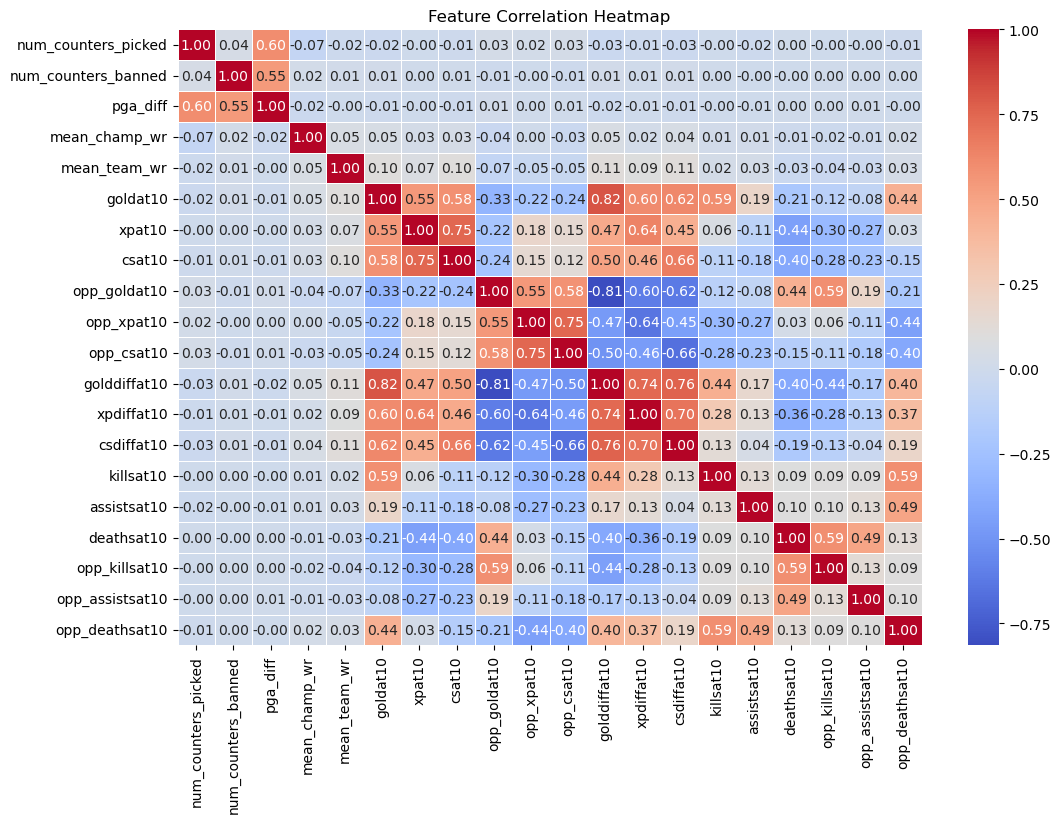

Highly correlated features to consider removing: set()
New dataset shape after removing redundant features: (78692, 20)


In [ ]:
#There is overfitting, lets analyze feature with high colliearity


numerical_features = df[[
    "num_counters_picked", "num_counters_banned", "pga_diff", 
    "mean_champ_wr", "mean_team_wr", "goldat10", "xpat10", "csat10", 
    "opp_goldat10", "opp_xpat10", "opp_csat10", "golddiffat10", 
    "xpdiffat10", "csdiffat10", "killsat10", "assistsat10", 
    "deathsat10", "opp_killsat10", "opp_assistsat10", "opp_deathsat10", 
]]

correlation_matrix = numerical_features.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify highly correlated features (threshold > 0.85)
threshold = 0.85
high_corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to consider removing:", high_corr_features)

# Create a new dataset without the highly correlated features
df_reduced = numerical_features.drop(columns=high_corr_features)
print(f"New dataset shape after removing redundant features: {df_reduced.shape}")


Trying logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', LogisticRegression(random_state=1, max_iter=1000, solver='liblinear'))
])

hyperparameters = {
    'classifier__C': [0.01, 0.1, 1, 10],  
    'classifier__penalty': ['l1', 'l2']  
}

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

searcher = GridSearchCV(
    pipeline, 
    hyperparameters, 
    cv=cv_strategy, 
    n_jobs=-1, 
    scoring='accuracy',
    verbose=2  
)

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)
testing_accuracy = searcher.score(X_test, y_test)

print("Best Parameters:", searcher.best_params_)
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Training Accuracy: 0.6388
Testing Accuracy: 0.6366


Trying Decision Tree

In [14]:


pipeline = Pipeline([
    ('preprocessor', preproc),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=1))
])

hyperparameters = {
    'classifier__max_depth': [2, 3, 4, 5, 7, 10, 13, 15, 18, None],
    'classifier__min_samples_split': [2, 5, 10, 20, 50, 100, 200],
    'classifier__criterion': ['entropy', 'gini']
}

searcher = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1, scoring='accuracy')

searcher.fit(X_train, y_train)

training_accuracy = searcher.score(X_train, y_train)

testing_accuracy = searcher.score(X_test, y_test)

print("Best Parameters:", searcher.best_params_)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

c:\Users\Viki Shi\.conda\envs\dsc80\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 7, 'classifier__min_samples_split': 2}
Training Accuracy: 0.6376421152510209
Testing Accuracy: 0.6253240481878717


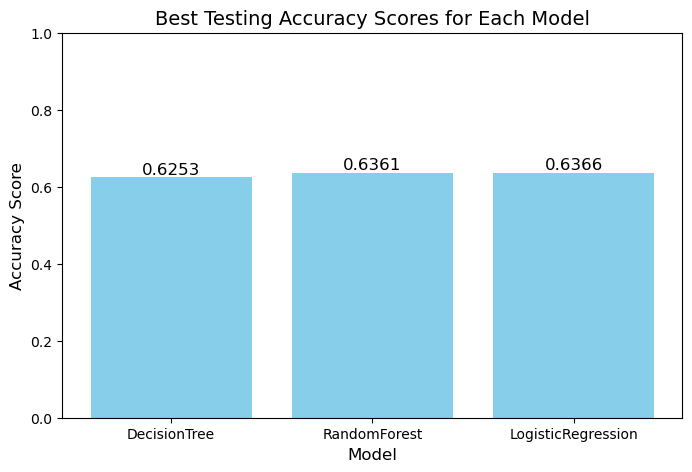

In [16]:

models = ["DecisionTree", "RandomForest", "LogisticRegression"]
accuracy_scores = [0.6253, 0.6361, 0.6366]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy_scores, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=12)

plt.title("Best Testing Accuracy Scores for Each Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.ylim(0, 1)  

plt.show()